In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

Above we can see that there are 614 rows and 13 columns in the dataset

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we can see that 8 columns have object datatype,1 column has int datatype and 4 columns have float datatype.

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there are null values present in the dataset which can be seen in the below heatmap as well.

<Axes: >

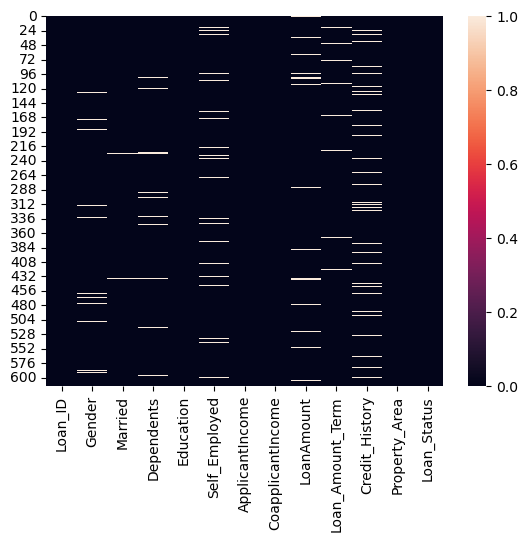

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.nunique().to_frame()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


Here we can see the number of unique values each column has. Since the dependent column(Loan_Status has only 2 variables, this makes it a classification problem.
Also since Loan_ID has all the 614 unique values we can drop this column

In [11]:
df=df.drop("Loan_ID",axis=1)

In [12]:
df.shape

(614, 12)

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

The datatype of dependents is object. we have to convert that into numeric datatype.

In [14]:
df['Dependents']=df['Dependents'].replace("3+","3")

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

Now we will change the datatype

In [16]:
df['Dependents'] = df['Dependents'].astype(float)

In [17]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Now we can see that dependents column in float datatype

Now lets work on the NaN values

In [19]:
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)

In [22]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have taken care of all the null values

Now lets seggregate the dataset in numerical and catagorical columns

In [26]:
numerical=[]
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
    else:
        numerical.append(i)

In [27]:
numerical

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [28]:
categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [29]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


here we can see that all the columns now have 614 non null values.
1)Mean is greater than median in Dependents, Applicants income, Coapplicant income,Loan amount which indicates the presence of right skewness.
2) Loan amount term and credit history have median greater than mean which indicates the presence of left skewness.
3)there is a big difference in 75th percentile and max value in applicant income, coapplicant income , loan amount which indicates the presence of outliers.
4) Standard deviation is also high in Applicants income and co applicants income which again indicates the presence of outliers

Male      502
Female    112
Name: Gender, dtype: int64

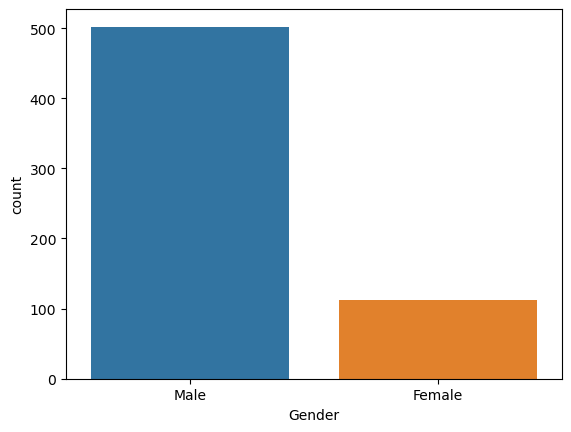

In [30]:
sns.countplot(x='Gender',data=df)
df['Gender'].value_counts()

Above graph shows that majority of the applicants are male.

Yes    401
No     213
Name: Married, dtype: int64

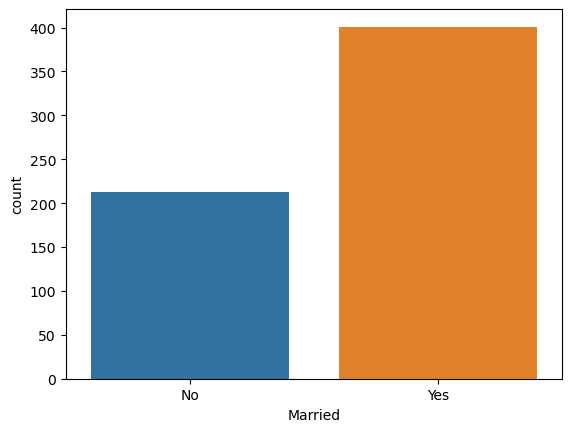

In [31]:
sns.countplot(x='Married',data=df)
df['Married'].value_counts()

Above graph shows that out the total 614 people 401 are married and rest are not married which indicates more married people apply for the loan

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

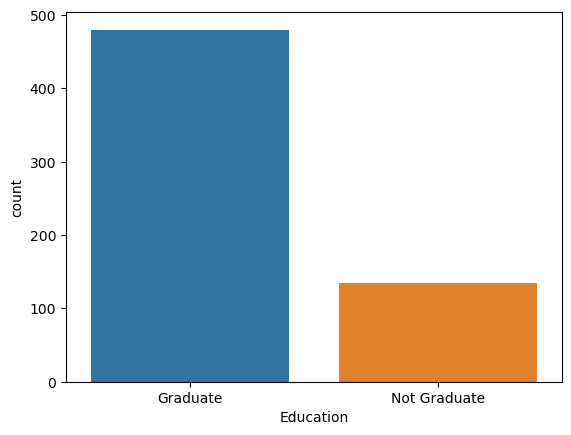

In [32]:
sns.countplot(x='Education',data=df)
df['Education'].value_counts()

Above graph shows that majority of the people who have applied for the loan are Graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64

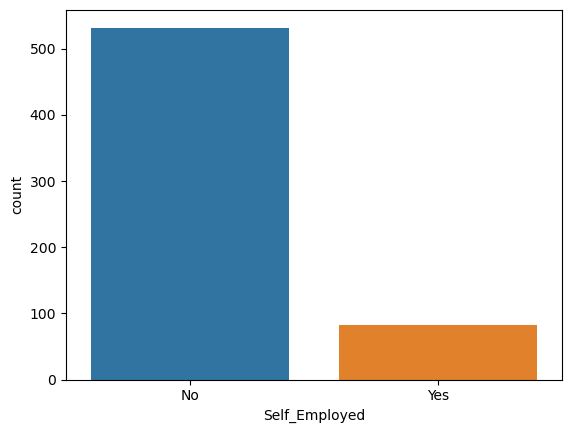

In [33]:
sns.countplot(x='Self_Employed',data=df)
df['Self_Employed'].value_counts()

Above graph indicates that very few(82) people in the dataset od 614 are self employed which could mean that majority are in job.

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

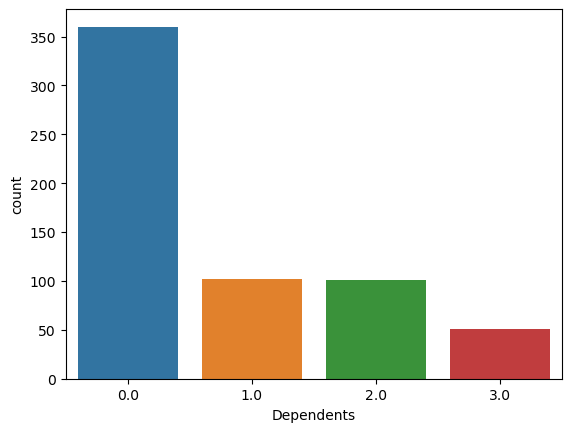

In [34]:
sns.countplot(x='Dependents',data=df)
df['Dependents'].value_counts()

Above graph shows majority(360)people in the dataset do no have any dependents. 101 and 102 people in the dataset have 1 and 2 dependents respectively and only 51 people have 3 or more dependents

Y    422
N    192
Name: Loan_Status, dtype: int64

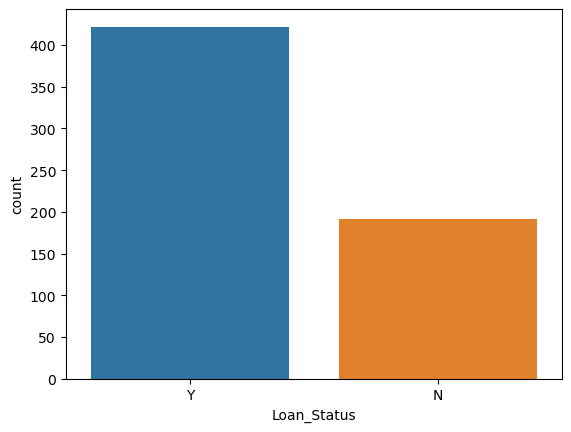

In [35]:
sns.countplot(x='Loan_Status',data=df)
df['Loan_Status'].value_counts()

Above graph shows the loan status 422 people have got their loan approved while 192 applications were rejected

1.0    525
0.0     89
Name: Credit_History, dtype: int64

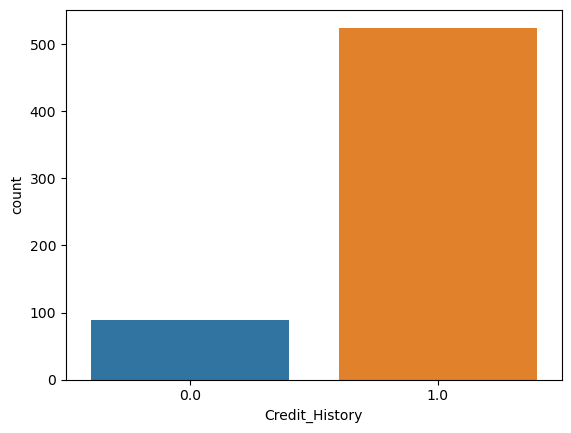

In [36]:
sns.countplot(x='Credit_History',data=df)
df['Credit_History'].value_counts()

Above graph indicates that 525 people have a good credit history out of 614

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

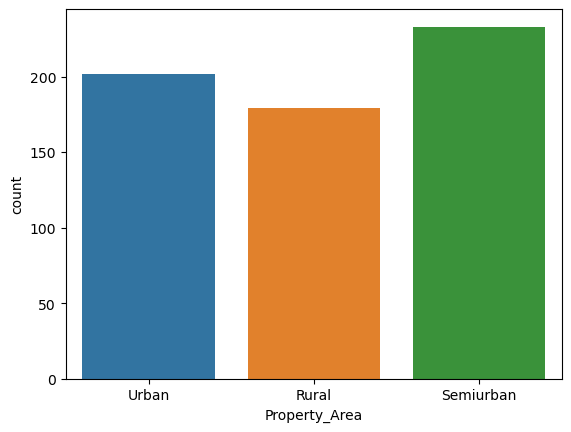

In [37]:
sns.countplot(x='Property_Area',data=df)
df['Property_Area'].value_counts()

As per the above graph the highest number of applicants are from semiurban areas followed by urban areas and the least number is from rural areas. Though there is not much difference in the numbers from each areas.

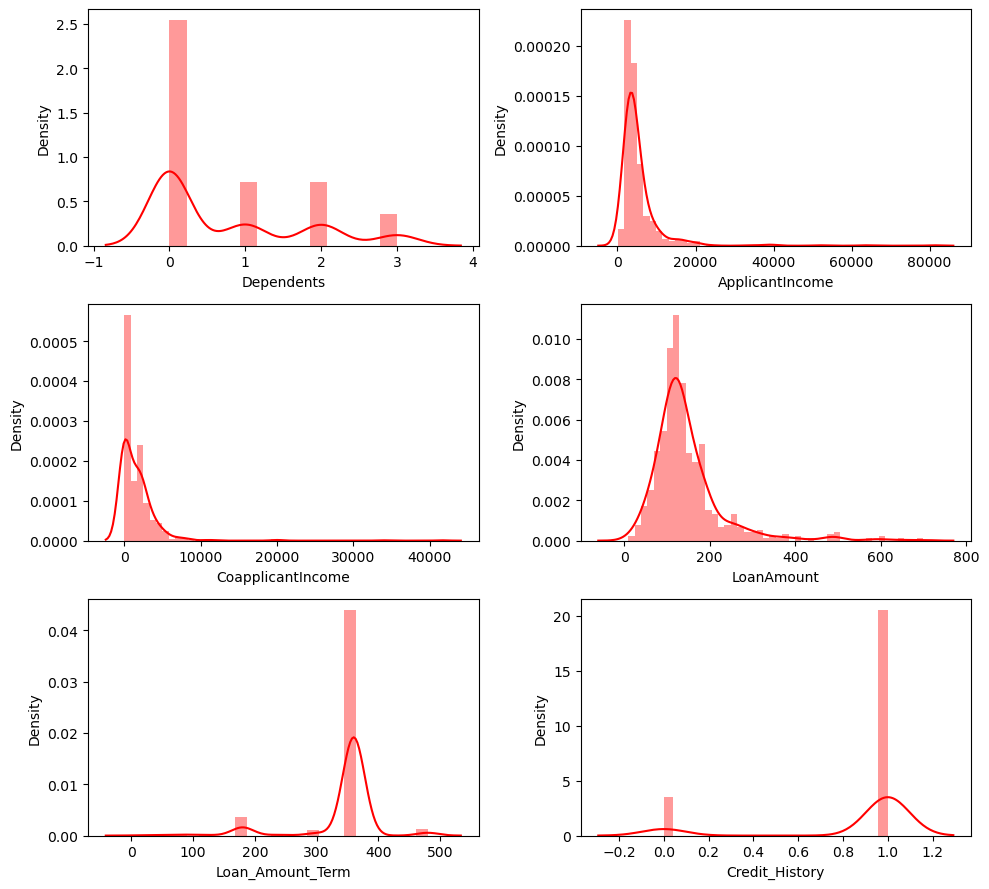

In [39]:
plt.figure(figsize=(10,9))
plotnumber=1
for col in numerical:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='r')
    plotnumber+=1
plt.tight_layout()    

Above distribution curves clearly establich what we have mentioned above that skewness is present in the data and loan amount term and credit history are lest skewed and rest are right skewed

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

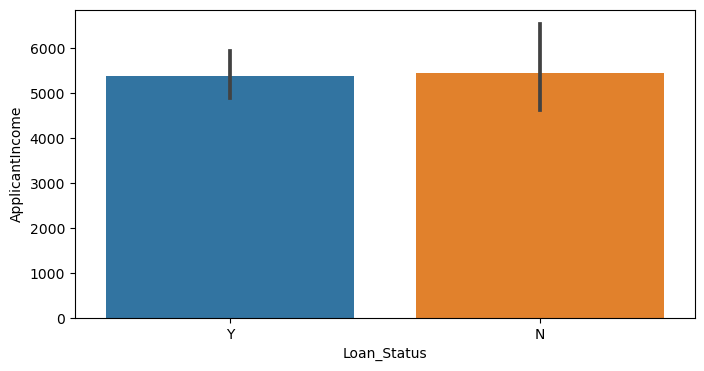

In [47]:
plt.figure(figsize=(8,4))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

Above graph shows that applicants income has not much impact on the loan status

<Axes: xlabel='Education', ylabel='count'>

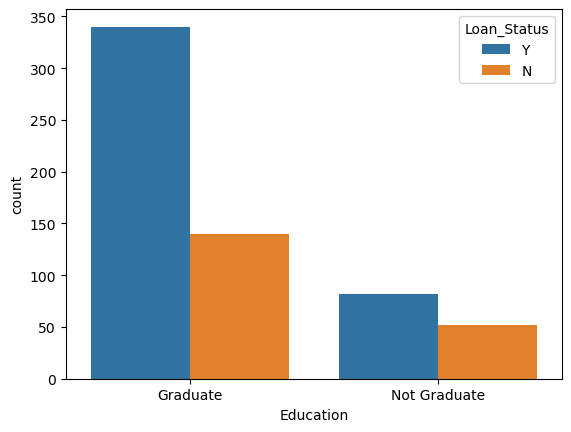

In [52]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

Above we can see that the loan is majorly granted to people who are graduate rather than those who are bot graduate

<Axes: xlabel='Married', ylabel='count'>

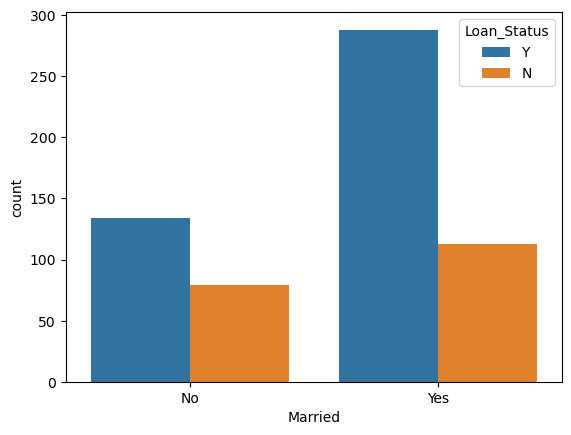

In [53]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

Here we can see that loan approval is granted majorly to people who are married than those who are not

<Axes: xlabel='Gender', ylabel='count'>

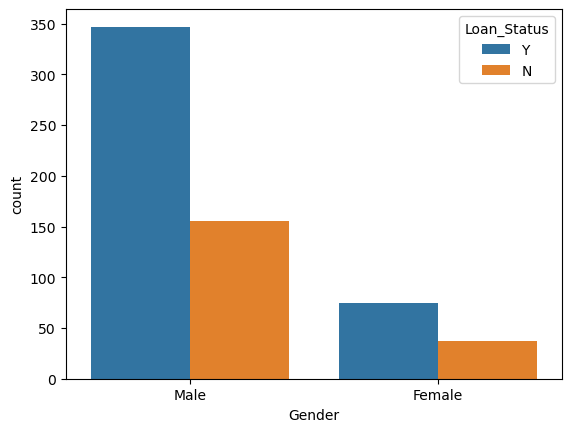

In [54]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

the percentage of loan approval in males is quite higher than that of females

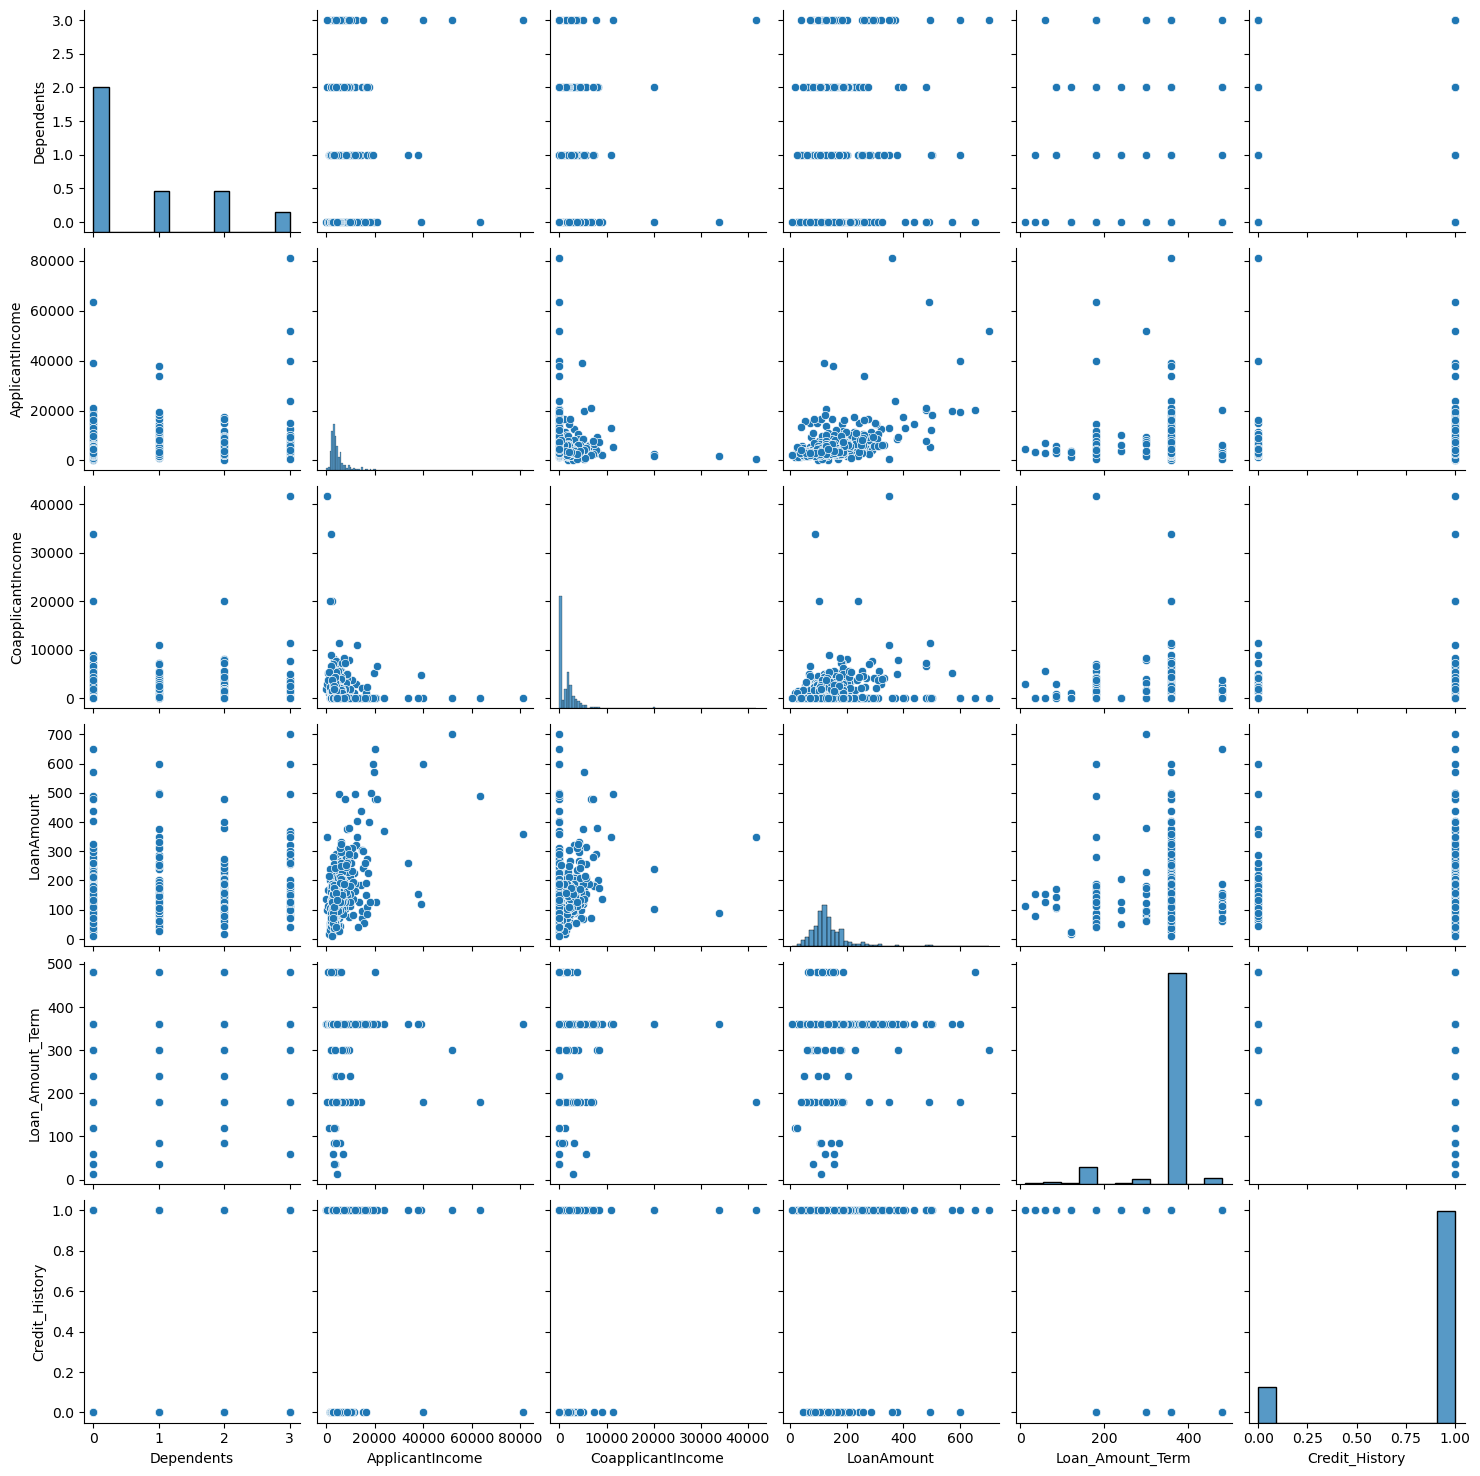

In [55]:
sns.pairplot(df)

Now we will encode the categorical columns into numerical

In [56]:
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))


In [57]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Here we can see that now all the columns have numerical datatype

Gender                  Axes(0.125,0.712609;0.227941x0.167391)
Married              Axes(0.398529,0.712609;0.227941x0.167391)
Dependents           Axes(0.672059,0.712609;0.227941x0.167391)
Education               Axes(0.125,0.511739;0.227941x0.167391)
Self_Employed        Axes(0.398529,0.511739;0.227941x0.167391)
ApplicantIncome      Axes(0.672059,0.511739;0.227941x0.167391)
CoapplicantIncome        Axes(0.125,0.31087;0.227941x0.167391)
LoanAmount            Axes(0.398529,0.31087;0.227941x0.167391)
Loan_Amount_Term      Axes(0.672059,0.31087;0.227941x0.167391)
Credit_History              Axes(0.125,0.11;0.227941x0.167391)
Property_Area            Axes(0.398529,0.11;0.227941x0.167391)
Loan_Status              Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

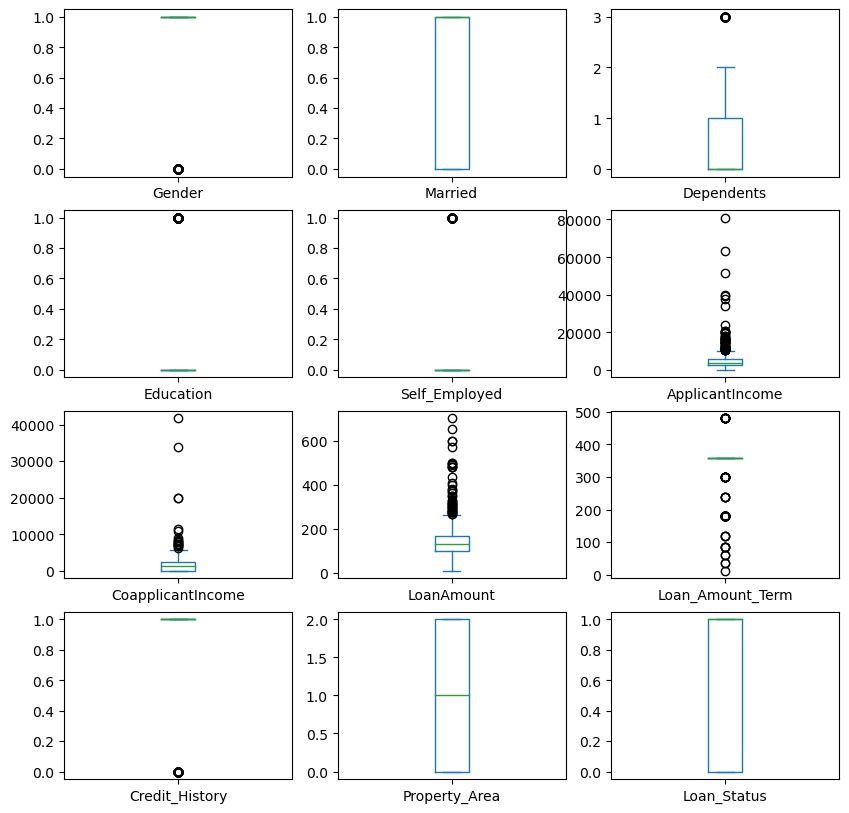

In [58]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

Above we can see that some outliers are present on LoanAmount, ApplicantIncome, Coapplicantincome and loan amount term

In [59]:
#removing outliers 
z=np.abs(zscore(df[['CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term']]))
z

,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term
0,0.554487,0.072991,0.211241,0.273231
1,0.038732,0.134412,0.211241,0.273231
2,0.554487,0.393747,0.948996,0.273231
3,0.251980,0.462062,0.306435,0.273231
4,0.554487,0.097728,0.056551,0.273231
...,...,...,...,...
609,0.554487,0.410130,0.889500,0.273231
610,0.554487,0.212557,1.258378,2.522836
611,0.472404,0.437174,1.276168,0.273231
612,0.554487,0.357064,0.490816,0.273231


In [60]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([0, 3, 3, 3, 1, 2, 3, 1, 2, 1, 2, 0, 2, 1, 1, 3, 3, 2, 2, 3, 1, 2,
        2, 0, 1, 0, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 3, 0, 3, 0, 2],
       dtype=int64))

In [61]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [62]:
print("Data Loss =",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data Loss = 0.06026058631921824


Here the data loss is very small so we will proceed with df1

In [63]:
#Skewness
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Since Gender,Married,Education,Self_Employed,Loan_Status were categorical columns, we will not remove their skewness

In [64]:
from scipy.stats import yeojohnson

In [65]:
df1['Dependents']=np.cbrt(df1['Dependents'])

In [69]:
df1['ApplicantIncome']=np.cbrt(df1['ApplicantIncome'])

In [71]:
df1['CoapplicantIncome']=np.cbrt(df1['CoapplicantIncome'])

In [74]:
df1['LoanAmount']=np.cbrt(df1['LoanAmount'])

In [76]:
df1['Loan_Amount_Term']=yeojohnson(df1['Loan_Amount_Term'],3)

In [83]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.499408
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.223551
CoapplicantIncome   -0.038951
LoanAmount           0.054080
Loan_Amount_Term     0.704996
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We can verify that if skewness has reduced on not by distribution graph

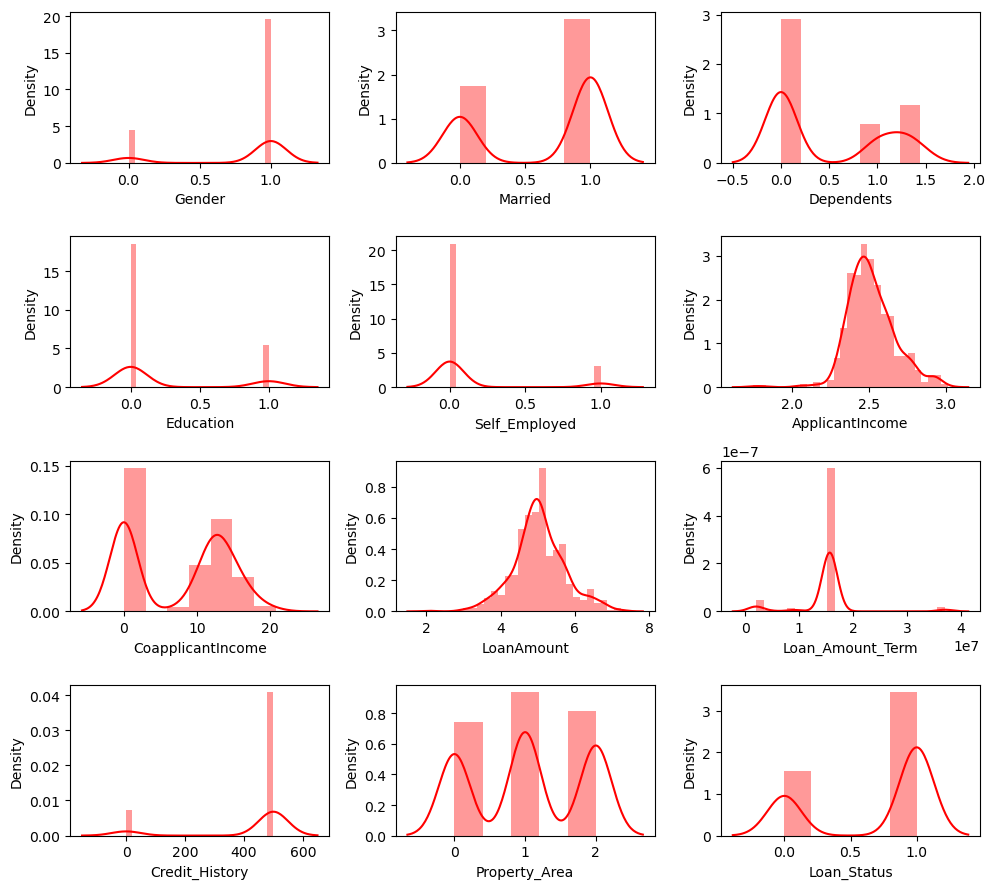

In [84]:
plt.figure(figsize=(10,9))
plotnumber=1
for col in df1:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[col],color='r')
    plotnumber+=1
plt.tight_layout()    

Above we can see that skewness has substantially reduced in ApplicantIncome, CoaplicantIncome,Loan Amount and Loan amount term

In [85]:
df1cor=df1.corr()

In [86]:
df1cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.184163,0.045696,-0.006207,0.056886,0.230714,0.172138,-0.098455,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.348678,0.024817,-0.015779,-0.023409,0.320626,0.181788,-0.128445,0.019308,0.010595,0.089026
Dependents,0.184163,0.348678,1.000000,0.060889,0.068837,0.108537,0.008877,0.135624,-0.095404,-0.016545,0.038083,0.017662
Education,0.045696,0.024817,0.060889,1.000000,-0.007139,-0.177139,0.030281,-0.128826,-0.062708,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.068837,-0.007139,1.000000,0.216542,-0.078584,0.117273,-0.051934,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.056886,-0.023409,0.108537,-0.177139,0.216542,1.000000,-0.345970,0.435425,-0.088403,0.029999,-0.011868,-0.003076
CoapplicantIncome,0.230714,0.320626,0.008877,0.030281,-0.078584,-0.345970,1.000000,0.231598,-0.013985,0.001735,-0.081866,0.071908
LoanAmount,0.172138,0.181788,0.135624,-0.128826,0.117273,0.435425,0.231598,1.000000,0.021808,-0.003557,-0.098000,-0.023597
Loan_Amount_Term,-0.098455,-0.128445,-0.095404,-0.062708,-0.051934,-0.088403,-0.013985,0.021808,1.000000,0.000042,-0.030124,-0.056382
Credit_History,0.013172,0.019308,-0.016545,-0.075217,-0.016390,0.029999,0.001735,-0.003557,0.000042,1.000000,-0.008121,0.560936


<Axes: >

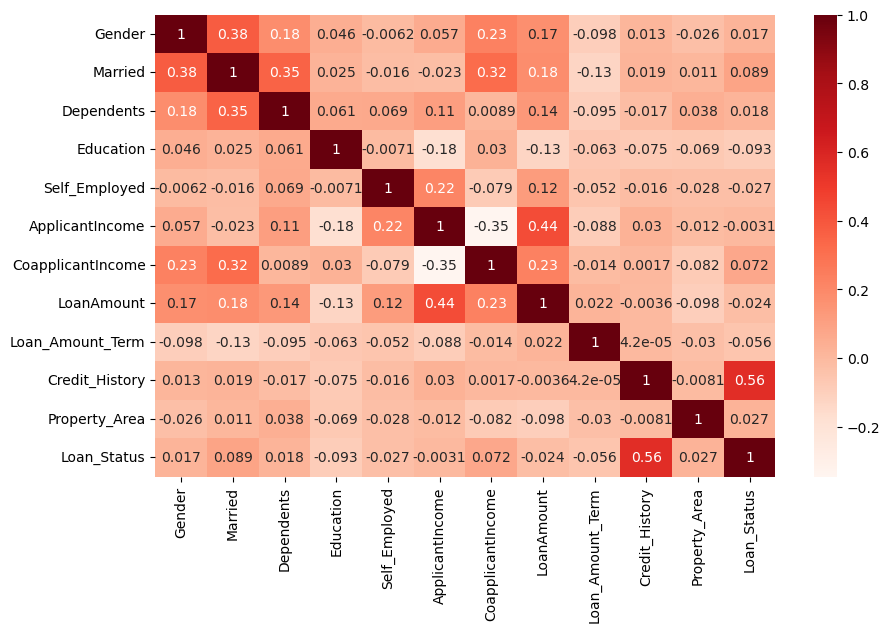

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(df1cor,annot=True,cmap='Reds')

Above we can see the correlation between various variables.
Loan Status is positively correlated to credit history
Loan AMount and Applicants income are positively correlated
Gender and married and dependents and married have a positive correlation
Applicants income and coapplicants income are highly negatively correlated
Educantion and Applicants income are also negatively correlated

In [88]:
df1cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.071908
Property_Area        0.026507
Dependents           0.017662
Gender               0.017408
ApplicantIncome     -0.003076
LoanAmount          -0.023597
Self_Employed       -0.026525
Loan_Amount_Term    -0.056382
Education           -0.092658
Name: Loan_Status, dtype: float64

Above we can see the correlation of all the columns with out target variable

In [89]:
#Now separating dependent and independent variables for predicting capacity_mw
x=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']

In [90]:
x.shape

(577, 11)

In [91]:
#now we will scale x 
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.673070,-1.093504,-0.000207,0.131541,0.418513,1.227472
1,0.477137,0.733939,0.878698,-0.541961,-0.380580,0.220359,0.596681,-0.000207,0.131541,0.418513,-1.306522
2,0.477137,0.733939,-0.806565,-0.541961,2.627567,-0.537515,-1.093504,-1.435403,0.131541,0.418513,1.227472
3,0.477137,0.733939,-0.806565,1.845150,-0.380580,-0.796775,0.868268,-0.154386,0.131541,0.418513,1.227472
4,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.721089,-1.093504,0.237176,0.131541,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.806565,-0.541961,-0.380580,-0.596622,-1.093504,-1.292267,0.131541,0.418513,-1.306522
573,0.477137,0.733939,1.624005,-0.541961,-0.380580,0.020352,-1.093504,-2.328463,-2.568205,0.418513,-1.306522
574,0.477137,0.733939,0.878698,-0.541961,-0.380580,1.290059,-0.177556,1.846922,0.131541,0.418513,1.227472
575,0.477137,0.733939,1.316734,-0.541961,-0.380580,1.168632,-1.093504,0.975515,0.131541,0.418513,1.227472


In [92]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Gender,1.218101
1,Married,1.418826
2,Dependents,1.187311
3,Education,1.066179
4,Self_Employed,1.057171
5,ApplicantIncome,1.788344
6,CoapplicantIncome,1.598652
7,LoanAmount,1.604874
8,Loan_Amount_Term,1.050088
9,Credit_History,1.008635


Above we can see that vif values of all the columns are low hence we will not drop any column

# Model Building for prediction of Loan Status

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [95]:
#finding best random state in df1
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best Accuracy is",maxAccu,"at random state", maxRS)

Best Accuracy is 0.8758620689655172 at random state 39


Creating train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

RANDOM FOREST CLASSIFIER

In [97]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
predRFC
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8827586206896552
[[ 27  16]
 [  1 101]]
              precision    recall  f1-score   support

         0.0       0.96      0.63      0.76        43
         1.0       0.86      0.99      0.92       102

    accuracy                           0.88       145
   macro avg       0.91      0.81      0.84       145
weighted avg       0.89      0.88      0.87       145



LOGISTIC REGRESSION

In [98]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
predLR
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8827586206896552
[[ 26  17]
 [  0 102]]
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        43
         1.0       0.86      1.00      0.92       102

    accuracy                           0.88       145
   macro avg       0.93      0.80      0.84       145
weighted avg       0.90      0.88      0.87       145



GAUSSIAN NAIVE BAYES

In [99]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
predgnb
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8758620689655172
[[29 14]
 [ 4 98]]
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76        43
         1.0       0.88      0.96      0.92       102

    accuracy                           0.88       145
   macro avg       0.88      0.82      0.84       145
weighted avg       0.88      0.88      0.87       145



KNN CLASSIFIER

In [100]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
predKNN
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8482758620689655
[[28 15]
 [ 7 95]]
              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72        43
         1.0       0.86      0.93      0.90       102

    accuracy                           0.85       145
   macro avg       0.83      0.79      0.81       145
weighted avg       0.84      0.85      0.84       145



SUPPORT VECTOR MACHINE CLASSIFIER

In [101]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.896551724137931
[[ 28  15]
 [  0 102]]
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        43
         1.0       0.87      1.00      0.93       102

    accuracy                           0.90       145
   macro avg       0.94      0.83      0.86       145
weighted avg       0.91      0.90      0.89       145



DECISION TREE CLASSIFIER

In [102]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7931034482758621
[[32 11]
 [19 83]]
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68        43
         1.0       0.88      0.81      0.85       102

    accuracy                           0.79       145
   macro avg       0.76      0.78      0.76       145
weighted avg       0.81      0.79      0.80       145



ADABOOST CLASSIFIER

In [103]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8551724137931035
[[27 16]
 [ 5 97]]
              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72        43
         1.0       0.86      0.95      0.90       102

    accuracy                           0.86       145
   macro avg       0.85      0.79      0.81       145
weighted avg       0.85      0.86      0.85       145



GRADIENT BOOSTING CLASSIFIER

In [104]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8551724137931035
[[28 15]
 [ 6 96]]
              precision    recall  f1-score   support

         0.0       0.82      0.65      0.73        43
         1.0       0.86      0.94      0.90       102

    accuracy                           0.86       145
   macro avg       0.84      0.80      0.81       145
weighted avg       0.85      0.86      0.85       145



BAGGING CLASSIFIER

In [105]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
predBC
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7931034482758621
[[29 14]
 [16 86]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66        43
         1.0       0.86      0.84      0.85       102

    accuracy                           0.79       145
   macro avg       0.75      0.76      0.76       145
weighted avg       0.80      0.79      0.79       145



EXTRA TREES CLASSIFIER

In [106]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
predET
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8068965517241379
[[29 14]
 [14 88]]
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        43
         1.0       0.86      0.86      0.86       102

    accuracy                           0.81       145
   macro avg       0.77      0.77      0.77       145
weighted avg       0.81      0.81      0.81       145



In [107]:
accuracy=pd.DataFrame([['RFC',accuracy_score(y_test,predRFC)],['LR',accuracy_score(y_test,predLR)],['GNB',accuracy_score(y_test,predgnb)],['KNN',accuracy_score(y_test,predKNN)],['SVC',accuracy_score(y_test,predsvc)],['DTC',accuracy_score(y_test,preddtc)],['Adaboost',accuracy_score(y_test,predad)],['Gradient Boosting',accuracy_score(y_test,predgb)],['Bagging',accuracy_score(y_test,predBC)],['ETC',accuracy_score(y_test,predET)]],columns=['Model','Accuracy'])
accuracy

,Model,Accuracy
0,RFC,0.882759
1,LR,0.882759
2,GNB,0.875862
3,KNN,0.848276
4,SVC,0.896552
5,DTC,0.793103
6,Adaboost,0.855172
7,Gradient Boosting,0.855172
8,Bagging,0.793103
9,ETC,0.806897


Above we can see that SVC is giving us the hisghest accuracy. Let us validate the same using Cross Val Score

CROSS VALIDATION SCORE

In [108]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predRFC)-score.mean())

[0.79310345 0.77586207 0.77391304 0.83478261 0.8173913 ]
0.7990104947526238
0.023740779988437235
Difference between Accuracy Score and Cross Validation Score is :  0.0837481259370314


In [109]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predLR)-score.mean())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433
Difference between Accuracy Score and Cross Validation Score is :  0.06467766116941542


In [110]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgnb)-score.mean())

[0.81034483 0.76724138 0.8        0.87826087 0.80869565]
0.8129085457271363
0.03618664945850289
Difference between Accuracy Score and Cross Validation Score is :  0.06295352323838088


In [111]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predKNN)-score.mean())

[0.77586207 0.75       0.7826087  0.84347826 0.79130435]
0.7886506746626687
0.03068235580411925
Difference between Accuracy Score and Cross Validation Score is :  0.05962518740629685


In [112]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predsvc)-score.mean())

[0.81896552 0.78448276 0.79130435 0.87826087 0.82608696]
0.8198200899550224
0.033218076908610124
Difference between Accuracy Score and Cross Validation Score is :  0.07673163418290863


In [113]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,preddtc)-score.mean())

[0.70689655 0.70689655 0.72173913 0.79130435 0.71304348]
0.7279760119940029
0.03212800854417765
Difference between Accuracy Score and Cross Validation Score is :  0.06512743628185924


In [114]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predad)-score.mean())

[0.75       0.75862069 0.7826087  0.82608696 0.8       ]
0.7834632683658171
0.02766917644742775
Difference between Accuracy Score and Cross Validation Score is :  0.07170914542728635


In [115]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgb)-score.mean())

[0.76724138 0.76724138 0.77391304 0.84347826 0.8173913 ]
0.7938530734632685
0.031082718238485255
Difference between Accuracy Score and Cross Validation Score is :  0.06131934032983499


In [116]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predET)-score.mean())

[0.78448276 0.76724138 0.77391304 0.7826087  0.75652174]
0.7729535232383807
0.010292700512073975
Difference between Accuracy Score and Cross Validation Score is :  0.03394302848575714


Above we can se that the CV score os SVC is highest and also the error is very low. Hence we can conclude that SVC is our best model

HYPERPARAMETER TUNING

In [123]:
params={ 'C': [0.1, 1, 10,100],'kernel': ['linear', 'rbf', 'poly'],'gamma': [0.1, 1,.01,.001, 'scale', 'auto']}

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
GCV=GridSearchCV(svc,params,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 0.01, 0.001, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [127]:
GCV.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

Final_model=SVC()
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
accur=accuracy_score(y_test,finalpred)
print(accur*100)

SAVING THE MODEL

In [138]:
import joblib
joblib.dump(Final_model,'Loan Approval Prediction.pkl')

['Loan Approval Prediction.pkl']

PREDICTING THE SAVED MODEL

In [140]:
#Lets load the saved model and get predictions
model=joblib.load("Loan Approval Prediction.pkl")

#prediction
prediction=model.predict(x_test)

In [141]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
140,0.0,0.0
141,1.0,1.0
142,0.0,0.0
143,1.0,1.0


Above we can see that our prediction is almost correct.

In [142]:
#FINISH